In [19]:
import ROOT as R
from math import sin, cos, pi, radians, sqrt

In [41]:
#Let the position of q2 be the origin of the above graph
#All points right of q2 have an x coordinate X > 0
#All points left of q2 have a y coordinate Y < 0

k_CONST = 8.9875518e9 #Couloumb Constant in Nm^2 / C^2

def get_distance(x1,y1,x2,y2):
    return sqrt((x2-x1)**2 + (y2-y1)**2)

def electrostatic_force_vector(charge1, charge2, x1, y1, x2, y2):
    if x1 == x2 and y1 == y2:
        return R.TVector3(0,0,0)
    else:
        unitVector = R.TVector3(x2-x1, y2-y1, 0).Unit()
        magnitude = -1*k_CONST*charge1*charge2/(get_distance(x1,y1,x2,y2)**2)
        return magnitude * unitVector
    
q1 = 12e-6 #12 microcoulombs
q2 = -24e-6 #24 microcoulombs
q3 = 36e-6 #36 microcoulombs
d = .16 #16 cm

v2_1 = electrostatic_force_vector(q1,q2,-1*d,0,0,0)
v3_1 = electrostatic_force_vector(q1,q3,-1*d,0,d,0)

v3_2 = electrostatic_force_vector(q2,q3,0,0,d,0) 
v1_2 = electrostatic_force_vector(q2,q1,0,0,-1*d,0)

v1_3 = electrostatic_force_vector(q3,q1,d,0,-1*d,0)
v2_3 = electrostatic_force_vector(q3,q2,d,0,0,0)

result1 = v2_1 + v3_1
result2 = v3_2 + v1_2
result3 = v1_3 + v2_3

print("force on q1:", result1.X())
print("force on q2:", result2.X())
print("force on q3:", result3.X())

force on q1: 63.19372359374999
force on q2: 202.2199155
force on q3: -265.41363909375


In [9]:
# Calculate components given angle and force
# we need to import the trig functions for use below
# ...
# ...
def get_components_2D(force, angleDegrees):
    angleRadians = radians(angleDegrees)
    x = force*cos(angleRadians)
    y = force*sin(angleRadians)
    return x,y,0

f = 1.6 #Newtons
angle = 110
vec = R.TVector3(*get_components_2D(f,angle))
vec.Print() #RESULT

TVector3 A 3D physics vector (x,y,z)=(-0.547232,1.503508,0.000000) (rho,theta,phi)=(1.600000,90.000000,110.000000)


In [21]:
from ROOT import TVector3 as V3   # I'm going to be a little lazy about my typing!
# here we make a list of location vectors and a list of charge values
Positions = [V3(.1,.2,0),V3(.2,.4,0),V3(1,.2,0),V3(.7,-.2,0),V3(.4,0,0)]  # in meters
Charges = [10,2,8,-4,12]   # in microcoulombs

In [22]:
# let's define some symbols to make our prinout look nice below
ihat='i\u0302'
jhat='j\u0302'

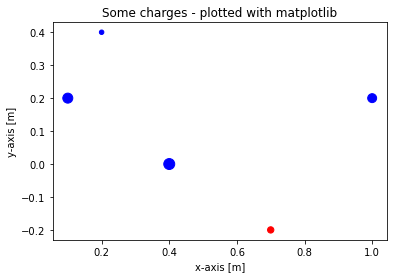

In [23]:
#matplotlib example
import matplotlib.pyplot as plt
import numpy as np
x = np.empty(len(Positions)) 
y = np.empty(len(Positions))
s = np.empty(len(Positions))
c = []
for i in range(len(Positions)): 
    x[i]=Positions[i].X()
    y[i]=Positions[i].Y()
    if Charges[i]<0: c.append("red")
    else: c.append("blue")
    s[i]=abs(Charges[i])*10
    
# Add titles (main and on axis)
plt.xlabel("x-axis [m]")
plt.ylabel("y-axis [m]")
plt.title("Some charges - plotted with matplotlib")
plt.scatter(x, y, s, c);     # the optional ; here is a trick to suppress an output message from the plotter

In [39]:
# Calculation goes here
# def electrostatic_force_vector(charge1, charge2, x1, y1, x2, y2):

Positions = [V3(.1,.2,0),V3(.2,.4,0),V3(1,.2,0),V3(.7,-.2,0),V3(.4,0,0)]  # in meters
Charges = [10,2,8,-4,12]   # in microcoulombs

redX = 0.7
redY = -0.2
redCharge = -4 * 10**-6
forceOnRedX = 0 #x component of total force on red
forceOnRedY = 0 #y component of total force on red

Charges = [x * 10**-6 for x in Charges] #convert microcoulombs to coulombs

for point, charge in zip(Positions, Charges):
    tempVector = electrostatic_force_vector(redCharge, charge, redX, redY, point.X(), point.Y())
    forceOnRedX += tempVector.X()
    forceOnRedY += tempVector.Y()
    
result = R.TVector3(forceOnRedX, forceOnRedY, 0)
result.Print()
    
Fx= forceOnRedX
Fy= forceOnRedY
# ...
# ...
print("F =",Fx,ihat,"+",Fy,jhat)  # use this print statement w/ the proper values added

F = -2.7215951571613215 î + 3.2351291201641965 ĵ
TVector3 A 3D physics vector (x,y,z)=(-2.721595,3.235129,0.000000) (rho,theta,phi)=(4.227664,90.000000,130.072668)
